# KPIs

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 1. Quantidade de pedidos mensal, trimestral e anual

In [2]:
orders = pd.read_csv("../datasets/trusted/delivered_orders.csv")
orders.count()

Unnamed: 0                       96211
order_id                         96211
customer_id                      96211
order_approved_at                96197
order_purchase_timestamp         96211
order_estimated_delivery_date    96211
order_delivered_carrier_date     96209
order_delivered_customer_date    96203
dtype: int64

In [3]:
purchase_time = pd.to_datetime(orders['order_purchase_timestamp'])

orders_by_year_and_month = pd.DataFrame({
        'id': orders['order_id'],
        'year': purchase_time.dt.year,
        'month': purchase_time.dt.month
})

count_by_month = orders_by_year_and_month.groupby(['year', 'month']).agg(['count'])
count_by_month

id
           count
year month      
2017 1       750
     2      1653
     3      2546
     4      2303
     5      3546
     6      3135
     7      3872
     8      4193
     9      4150
     10     4478
     11     7289
     12     5513
2018 1      7069
     2      6555
     3      7003
     4      6798
     5      6749
     6      6099
     7      6159
     8      6351

### Mensal

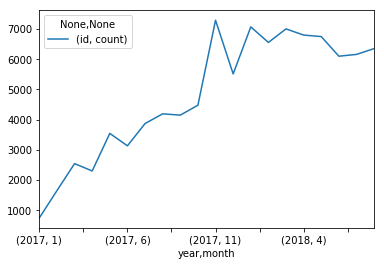

In [4]:
count_by_month.plot.line()

### Trimestral

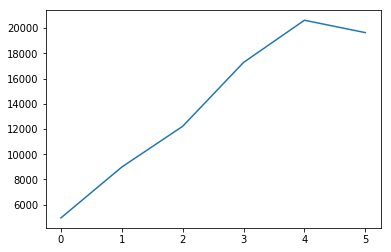

In [5]:
def trimester(year, n):
    first_month = 3 * n + 1
    return count_by_month.T[year][[first_month, first_month + 1, first_month + 2]].T.sum()

years = count_by_month.index.levels[0]
trimesters = []
for y in years:
    try:
        for i in range(4):
            trimesters.append(trimester(y, i))
    except KeyError:
        pass

plt.plot(trimesters)

### Anual

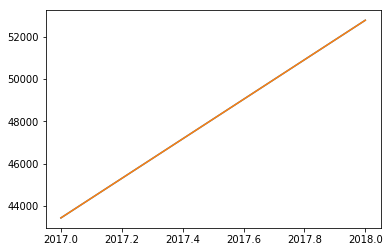

In [6]:
by_year = orders_by_year_and_month.groupby(['year']).agg(['count'])
plt.plot(by_year)

## 2. Média de valor dos pedidos

In [7]:
sold = pd.read_csv('../datasets/trusted/sold_products.csv')
sold.head()

,Unnamed: 0,product_id,order_id,price,freight_value,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_carrier_date,order_delivered_customer_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,2017-09-13 08:59:02,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-20 23:43:48,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,1,4244733e06e7ecb4970a6e2683c13e61,130898c0987d1801452a8ed92a670612,55.9,17.96,2017-06-28 11:52:20,2017-07-26 00:00:00,2017-07-05 12:00:33,2017-07-13 20:39:29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,2,4244733e06e7ecb4970a6e2683c13e61,532ed5e14e24ae1f0d735b91524b98b9,64.9,18.33,2018-05-18 10:25:53,2018-06-07 00:00:00,2018-05-23 14:05:00,2018-06-04 18:34:26,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,3,4244733e06e7ecb4970a6e2683c13e61,6f8c31653edb8c83e1a739408b5ff750,58.9,16.17,2017-08-01 18:38:42,2017-08-25 00:00:00,2017-08-02 19:07:36,2017-08-09 21:26:33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,4,4244733e06e7ecb4970a6e2683c13e61,7d19f4ef4d04461989632411b7e588b9,58.9,13.29,2017-08-10 21:48:40,2017-09-01 00:00:00,2017-08-11 19:43:07,2017-08-24 20:04:21,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [8]:
sold['price'].mean()

119.958383054241

In [9]:
sold['price'].std()

182.34615823122195

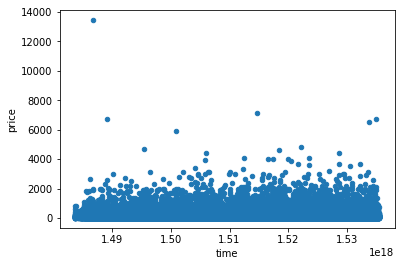

In [10]:
purchases = sold[['order_id', 'price']].groupby(['order_id']).agg(['sum'])

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

order_price_by_year_and_month = pd.DataFrame({
        'price': purchases['price']['sum'].values,
        'time': pd.to_numeric(orders['order_purchase_timestamp']),
        'year': orders['order_purchase_timestamp'].dt.year.values,
        'month': orders['order_purchase_timestamp'].dt.month.values
})
order_price_by_year_and_month.head()

order_price_by_year_and_month.plot.scatter(x='time', y='price')

In [11]:
sold['order_purchase_timestamp'] = pd.to_datetime(sold['order_purchase_timestamp'])
sold = sold.sort_values('order_purchase_timestamp')

item_price_by_year_and_month = pd.DataFrame({
        'price': sold['price'],
        'year': sold['order_purchase_timestamp'].dt.year,
        'month': sold['order_purchase_timestamp'].dt.month
})
item_price_by_year_and_month.head()

,price,year,month
74588,10.9,2017,1
102963,10.9,2017,1
76303,2.9,2017,1
93619,7.9,2017,1
90535,9.9,2017,1


In [12]:
order_price_by_month = order_price_by_year_and_month.groupby(['year', 'month']).agg(['mean', 'std'])
order_price_by_month

price                             time              
                  mean         std                 mean           std
year month                                                           
2017 1      127.984253  159.601867  1485133905799999232  5.922613e+14
     2      146.274834  384.530244  1487019931621899520  6.830595e+14
     3      136.886555  231.180540  1489693574597015040  7.573199e+14
     4      136.874703  196.158941  1492359489989578496  7.651725e+14
     5      133.695426  195.661166  1494956525882116096  7.590491e+14
     6      134.391668  193.796365  1497527998762041088  7.585288e+14
     7      137.430979  208.663999  1500250411165031424  7.487678e+14
     8      137.540193  198.239291  1502882231134033152  7.821262e+14
     9      141.203723  238.899348  1505521330970362880  7.228292e+14
     10     134.444969  176.270556  1508151409023672832  7.613276e+14
     11     136.188598  186.862225  1511113916713398784  7.042288e+14
     12     137.169122  219.061018  1513209377030293248  7.442889e+14
2018 1      136.837656  206.347869  1516136520521569280  7.391713e+14
     2      138.675483  208.097715  1518715546182913280  7.084531e+14
     3      136.042298  199.118758  1521170409799231744  7.622215e+14
     4      138.522927  205.774996  1523848473067960576  7.444960e+14
     5      135.399927  192.242931  1526275757751961600  7.122327e+14
     6      141.535663  221.132403  1529115995076895488  7.280294e+14
     7      134.519115  194.748641  1531881652819125504  7.798705e+14
     8      135.740625  219.391313  1534083323271607808  6.140733e+14

In [13]:
item_price_by_month = item_price_by_year_and_month.groupby(['year', 'month']).agg(['mean', 'std'])
item_price_by_month

price            
                  mean         std
year month                        
2017 1      122.451654  203.003077
     2      126.062110  264.696822
     3      123.989938  215.672059
     4      132.607894  246.185283
     5      122.212350  204.286088
     6      120.929599  200.939255
     7      109.058995  139.303748
     8      115.634709  156.782826
     9      128.224545  187.698677
     10     124.328280  188.310827
     11     116.550486  166.789114
     12     117.348180  159.625381
2018 1      115.048526  155.052980
     2      109.927791  143.748341
     3      118.916833  168.286904
     4      124.381511  190.188090
     5      125.165773  195.668878
     6      122.122377  187.466675
     7      124.652227  203.421310
     8      117.414819  184.707626

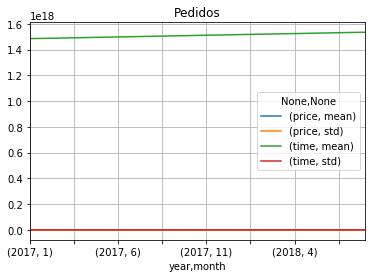

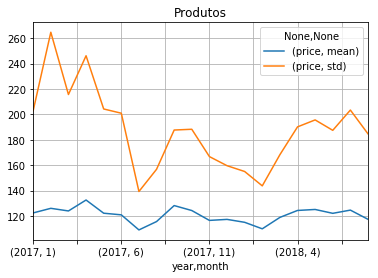

In [14]:
order_price_by_month.plot.line(title="Pedidos", grid=True)
item_price_by_month.plot.line(title="Produtos", grid=True)